# Analysis of the collected data

The data was collected from the BoardGameGeek API ("https://boardgamegeek.com/xmlapi2/thing
"). It contains a comprehensive collection of board games, with a wide range of information including game names, rankings, ratings, descriptions, and various other details.

Firstly, we will load the data and analyze each column to retrieve only relevant information.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df1 = pd.read_csv("bgg_boardgames_full_sorted_part01.csv")
df2 = pd.read_csv("bgg_boardgames_full_sorted_part02.csv")
df3 = pd.read_csv("bgg_boardgames_full_sorted_part03.csv")

# Concatenate the dataframes while maintaining their order
df = pd.concat([df1, df2, df3], ignore_index=True)

print(df.head(1))

C:\Users\lucas\AppData\Local\Temp\ipykernel_23660\638423124.py:6: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("bgg_boardgames_full_sorted_part01.csv")


       id       type               name  \
0  224517  boardgame  Brass: Birmingham   

                                           alt_names  yearpublished  \
0  Brass. Бирмингем, Brass. Бірмінгем, ブラス：バーミンガム...           2018   

                                         description  \
0  Brass: Birmingham is an economic strategy game...   

                                               image  \
0  https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...   

                                           thumbnail  minplayers  maxplayers  \
0  https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...           2           4   

   ...   stddev  median  owned  trading wanting wishing numweights  \
0  ...  1.42058       0  77098      288    1749   20493       2638   

  averageweight rank_boardgame           ranks_other  
0        3.8685              1  Strategy Game Rank:1  

[1 rows x 37 columns]


We will start our investigation on the first and the second column analyzing if there are repeated or null id's and if in the second column there is only one type of game or null value (boardgame)

There are 0 duplicated rows
There are 0 duplicated IDs
There are 0 null IDs
There are 0 null types


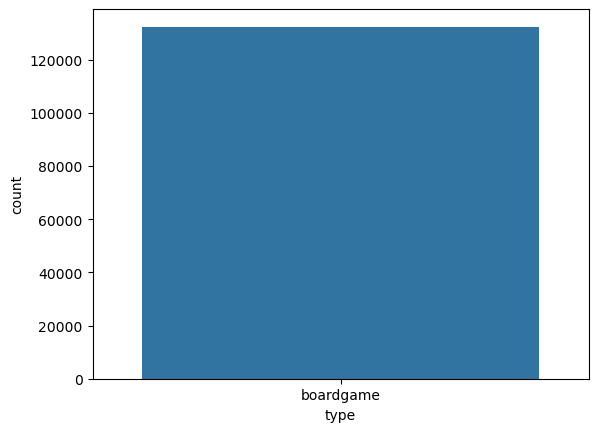

In [3]:
duplicateds = df[df.duplicated()]

print(f'There are {duplicateds.shape[0]} duplicated rows') # duplicated rows

duplicatedsId = df[df.duplicated(subset=["id"])]

print(f'There are {duplicatedsId.shape[0]} duplicated IDs')  # duplicated ids

null_ids = df[df["id"].isna()].shape[0]
null_type = df[df["type"].isna()].shape[0]

print(f'There are {null_ids} null IDs')
print(f'There are {null_type} null types')

sb.countplot(df, x = "type")
plt.show()

As we observe, all entries in the "type" column are labeled as "boardgame," which is expected. Therefore, we can safely remove this column, as it does not contribute meaningfully to our analysis.

We will now validate key parameters, starting with the number of players and the name field, to identify any irregular or unexpected values.

In [4]:
# Check for validity in key columns
invalid_players = df[(df['minplayers'].isnull()) | (df['maxplayers'].isnull()) | (df['minplayers'] == 0) | (df['maxplayers'] == 0)]
invalid_names = df[df['name'].isnull()]
print(f"Rows with invalid player numbers: {invalid_players.shape[0]}")
print(f"Rows with missing names: {invalid_names.shape[0]}")
if not invalid_players.empty:
    print("Sample invalid player rows:")
    print(invalid_players.head())
if not invalid_names.empty:
    print("Sample rows with missing names:")
    print(invalid_names.head())

Rows with invalid player numbers: 5811
Rows with missing names: 0
Sample invalid player rows:
          id       type                                               name  \
3325   21804  boardgame                             Traditional Card Games   
3893   18291  boardgame                              Unpublished Prototype   
4006   37301  boardgame                                            Decktet   
5137   23953  boardgame                           Outside the Scope of BGG   
5837  170669  boardgame  Old School Tactical: Volume 1 – Fighting on th...   

                                 alt_names  yearpublished  \
3325   Kaarten, Kaartspelen, Playing Cards              0   
3893                                   NaN              0   
4006  Deco Decktet, Double Decktet, Дектет           2008   
5137                                   NaN              0   
5837                                   NaN           2016   

                                            description  \
3325  Tradi

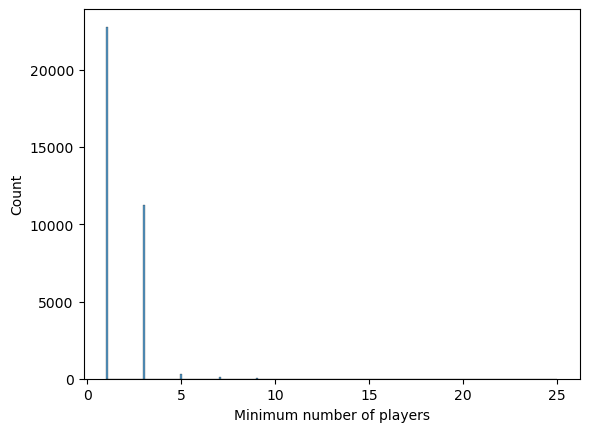

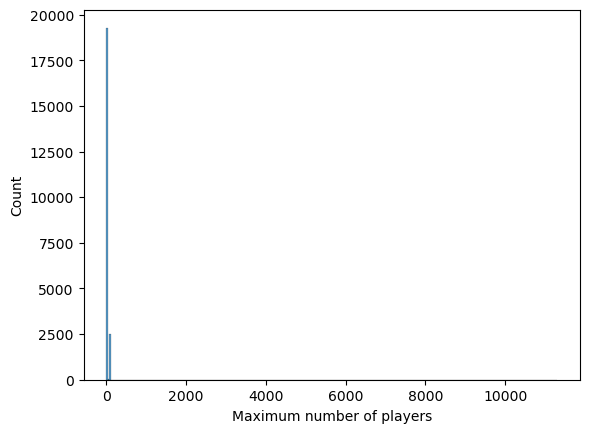

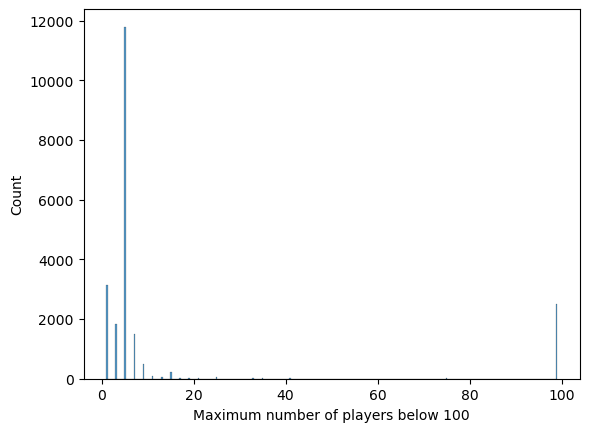

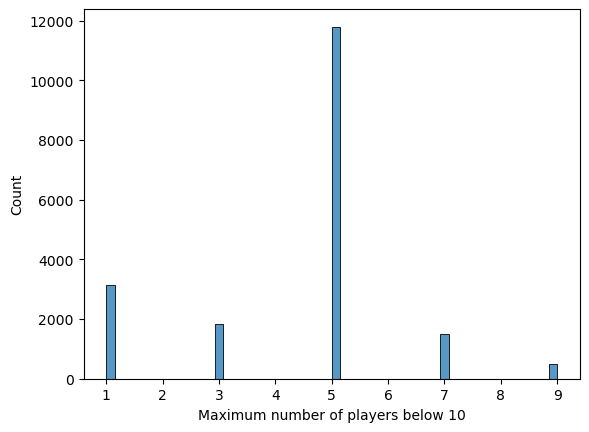

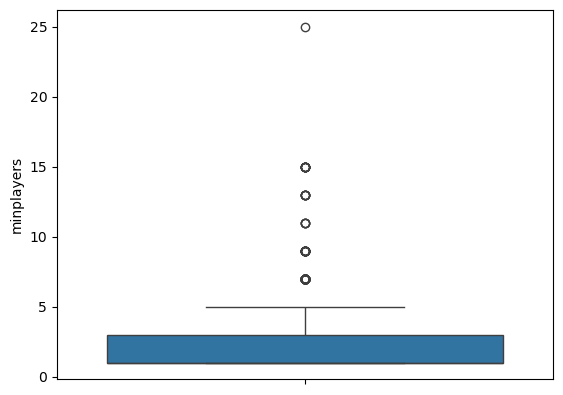

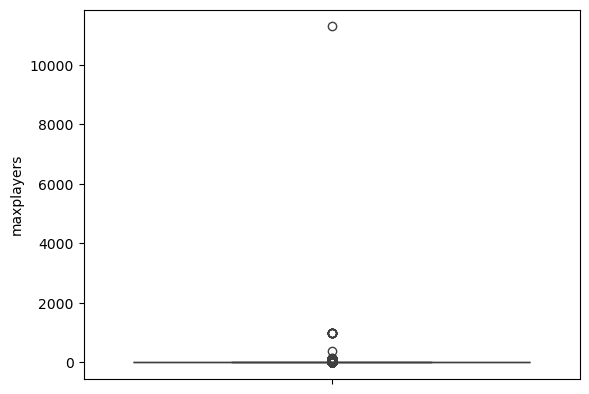

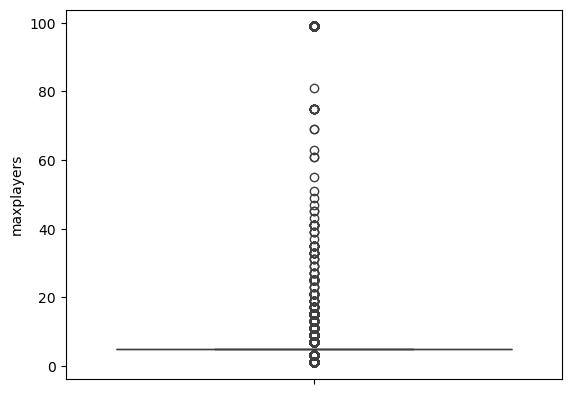

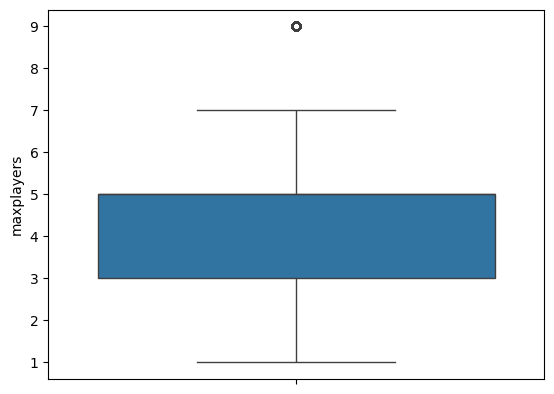

The game with the biggest minimum amount of players has 25 players
The game with the biggest maximum amount of players has 11299 players
The game with the biggest maximum amount of players is 31932    TOM: The Origins Metagame
Name: name, dtype: object


In [5]:
min_players_non_null = df.loc[df["minplayers"].notna() & df["minplayers"] != 0]
max_players_non_null = df.loc[df["maxplayers"].notna() & df["maxplayers"] != 0]
max_players_below_100 = max_players_non_null.loc[max_players_non_null["maxplayers"] < 100]
max_players_below_10 = max_players_non_null.loc[max_players_non_null["maxplayers"] < 10]

sb.histplot(min_players_non_null, x = "minplayers")
plt.xlabel("Minimum number of players")
plt.ylabel("Count")
plt.show()

sb.histplot(max_players_non_null, x = "maxplayers")
plt.xlabel("Maximum number of players")
plt.ylabel("Count")
plt.show()

sb.histplot(max_players_below_100, x = "maxplayers")
plt.xlabel("Maximum number of players below 100")
plt.ylabel("Count")
plt.show()

sb.histplot(max_players_below_10, x = "maxplayers")
plt.xlabel("Maximum number of players below 10")
plt.ylabel("Count")
plt.show()

sb.boxplot(min_players_non_null, y = "minplayers")
plt.show()

sb.boxplot(max_players_non_null, y = "maxplayers")
plt.show()

sb.boxplot(max_players_below_100, y = "maxplayers")
plt.show()

sb.boxplot(max_players_below_10, y = "maxplayers")
plt.show()

print(f'The game with the biggest minimum amount of players has {max(min_players_non_null["minplayers"])} players')
print(f'The game with the biggest maximum amount of players has {max(max_players_non_null["maxplayers"])} players')
print(f'The game with the biggest maximum amount of players is {max_players_non_null.loc[df["maxplayers"] == max(max_players_non_null["maxplayers"]), "name"]}')

Although all games have valid names, 5,811 entries lack meaningful player count data—either null or zero values for minimum or maximum players. This suggests missing metadata, which may require external validation. Given the dataset’s size, we can afford to discard these entries to maintain analytical consistency.
We observe that the minimum number of players required can vary significantly, with some games allowing up to 25 players. However, the vast majority of games have a minimum player count below 5. On the other hand, the maximum number of players shows even greater variability, reaching an extreme of 11,299 players in one case. Despite this outlier, most games support a maximum of fewer than 10 players. Although rare, board games with unusually high player counts do exist, so these outliers are valid and should be retained. These bigger results come from modular games that con be scaled. The maximum amount can be just a symbolic value.

Next, we turn to the 'alt names' column, which records alternative titles for each game. We'll assess this field for missing values, keeping in mind that not all games are expected to have alternate names. 

In [6]:
print(f'The column \'alt_names\' has {df[df["alt_names"].isna()].shape[0]} missing values.')

The column 'alt_names' has 108918 missing values.


While the column shows a high number of missing values, this is not concerning—alternative names are optional, and their absence does not compromise the dataset’s integrity.

Next, we are going to analize the 'yearpublished' column that lists the year of publishment of each game.

The column 'yearpublished' has 10618 missing values.
The column 'yearpublished' has 852 values after 2025. This means these games were not released for now.


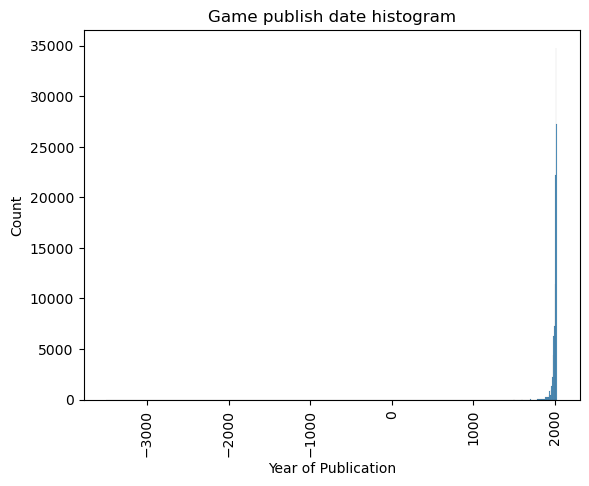

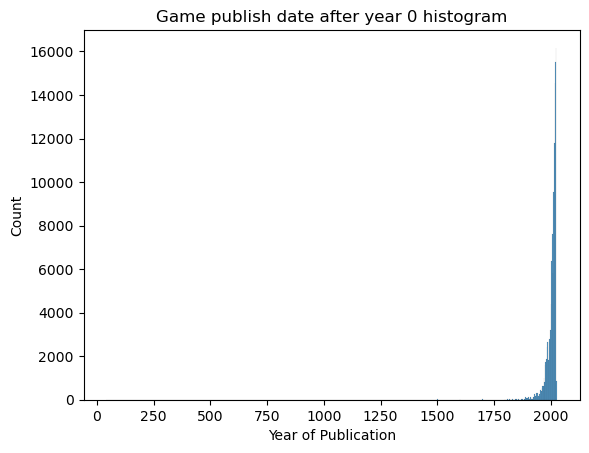

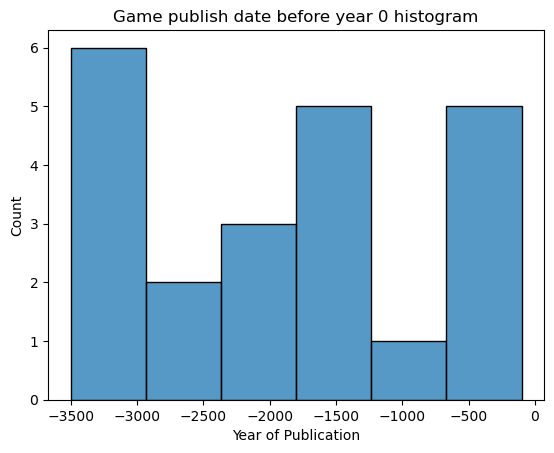

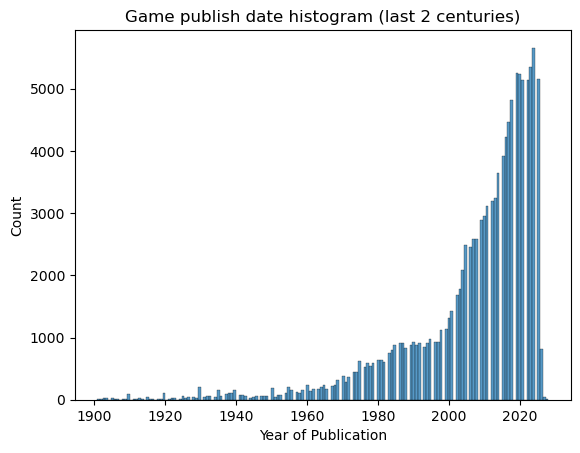

In [7]:
print(f'The column \'yearpublished\' has {df[df["yearpublished"].isna()].shape[0] + df[df["yearpublished"] == 0].shape[0]} missing values.')
print(f'The column \'yearpublished\' has {df[df["yearpublished"] > 2025].shape[0]} values after 2025. This means these games were not released for now.')
non_null_years_pub = df.loc[(df["yearpublished"].notna()) & (df["yearpublished"] != 0)]
sb.histplot(non_null_years_pub, x = "yearpublished")

plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date histogram")
plt.xticks(rotation = 90)
plt.show()

positive_years_pub = non_null_years_pub.loc[df["yearpublished"] > 0]
negative_years_pub = non_null_years_pub.loc[df["yearpublished"] < 0]
recent_releases = non_null_years_pub.loc[df["yearpublished"] > 1900]
sb.histplot(positive_years_pub, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date after year 0 histogram")
plt.show()
sb.histplot(negative_years_pub, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date before year 0 histogram")
plt.show()
sb.histplot(recent_releases, x = "yearpublished")
plt.xlabel("Year of Publication")
plt.ylabel("Count")
plt.title("Game publish date histogram (last 2 centuries)")
plt.show()



"The dataset includes games spanning a wide range of publication dates, with some entries even predating the Common Era. However, the majority were released within the last two centuries, with a strong concentration in the 21st century—particularly over the past decade. Notably, there are entries with missing publication dates, as well as others with future dates beyond the current year (2025), indicating that these games have not yet been released. To ensure temporal consistency and analytical reliability, these records should be excluded from further analysis. 

Now we will check if there are null or empty descriptions.

In [8]:
invalid_description = df.loc[df["description"].isna() | (df["description"].str.strip() == "")]
print(f'There are {invalid_description.shape[0]} null descriptions')

There are 37 null descriptions


The number of entries with null or empty descriptions is minimal, making it reasonable to discard them without impacting the number os entries in the final dataset.

Next, we examine the **'image' and 'thumbnail'** columns, which contain links to visual assets associated with each game. Since the search system is primarily text-based, these visual references offer limited utility for our analysis. Therefore, it is reasonable to exclude both columns from the dataset.

Now we will analyze the columns related to the playing time.

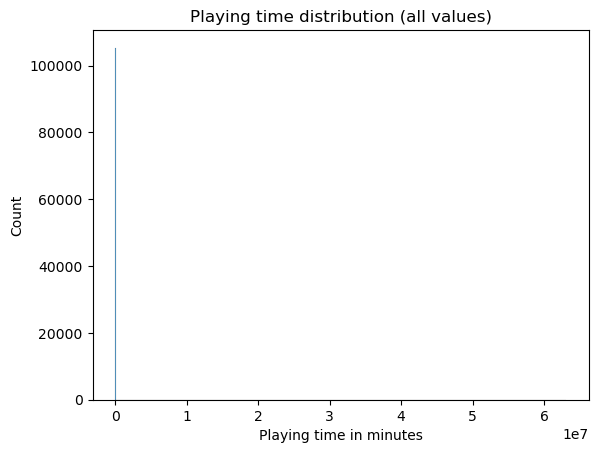

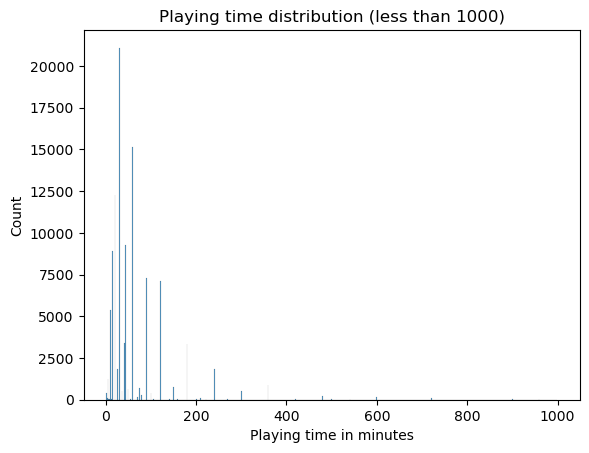

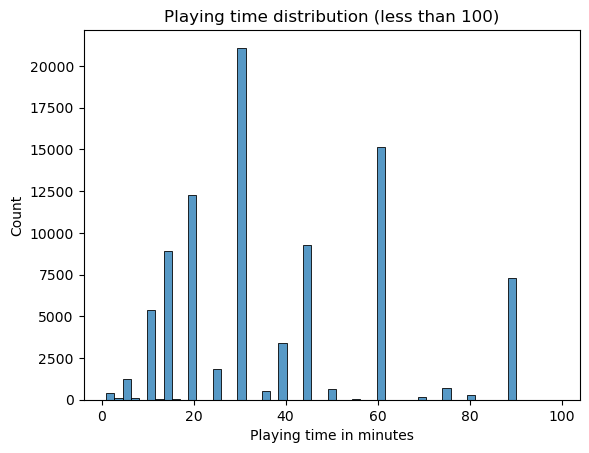

Maximum playing time is 63072000
There are 27020 null playing times
There are 288 extreme playing times (more than 1000 minutes)


In [9]:
null_playingtime = df[(df["playingtime"] == 0) | (df["playingtime"].isna())]
non_null_playingtime = df.loc[(df["playingtime"] != 0) & df["playingtime"].notna()]
less_than_1000_playingtime = non_null_playingtime.loc[non_null_playingtime["playingtime"] < 1000]
less_than_100_playingtime = non_null_playingtime.loc[non_null_playingtime["playingtime"] < 100]

sb.histplot(non_null_playingtime, x = "playingtime")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (all values)")
plt.show()

sb.histplot(less_than_1000_playingtime, x = "playingtime")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 1000)")
plt.show()

sb.histplot(less_than_100_playingtime, x = "playingtime")
plt.xlabel("Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 100)")
plt.show()


print(f'Maximum playing time is {max(df["playingtime"])}')
print(f'There are {null_playingtime.shape[0]} null playing times')
print(f'There are {non_null_playingtime.loc[non_null_playingtime["playingtime"] > 1000].shape[0]} extreme playing times (more than 1000 minutes)')

It is evident that some games exhibit extremely high average playing times, with several exceeding 1000 minutes (over 16 hours). While such durations are rare, they may be valid for highly complex or marathon-style games. However, the most extreme values appear unrealistic. For instance, one entry lists an average playing time of 63,072,000 minutes—equivalent to 1,051,200 hours, or more than a century. This likely reflects either a data entry error or a game with no defined endpoint. Such outliers should be removed from the dataset or search in another source to improve the information, as they distort the overall analysis and search results.

On the other hand, most games tend to have a duration of 60 minutes or less, although a notable portion extends beyond 100 minutes, indicating a diverse range of gameplay experiences.

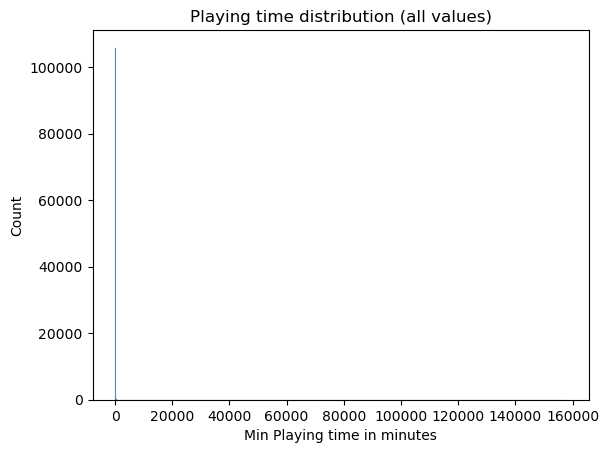

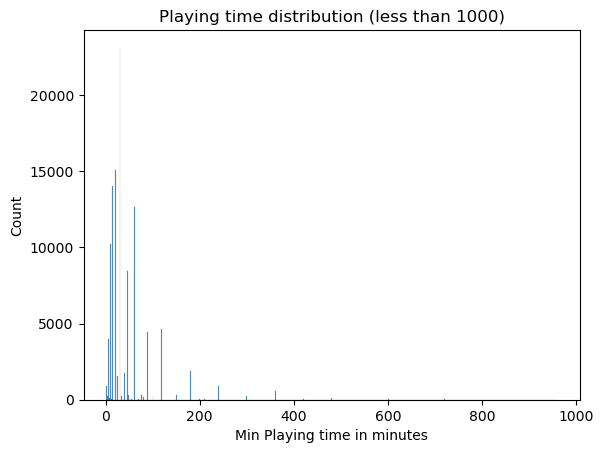

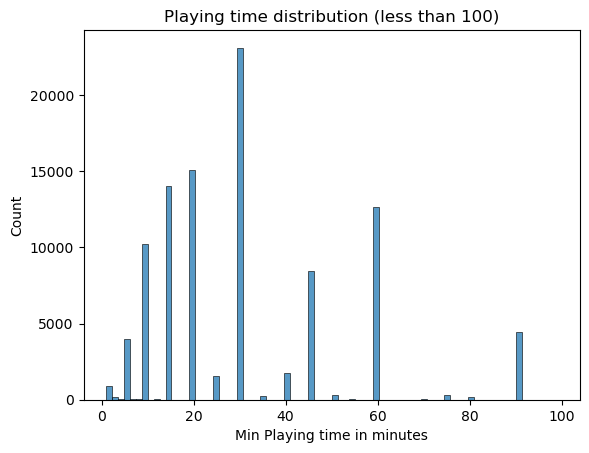

Maximum min playing time is 157680
There are 25374 null min playing times
There are 64 extreme min playing times (more than 1000 minutes)


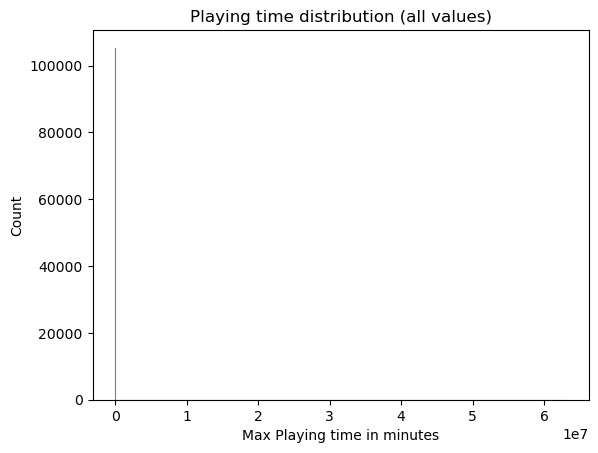

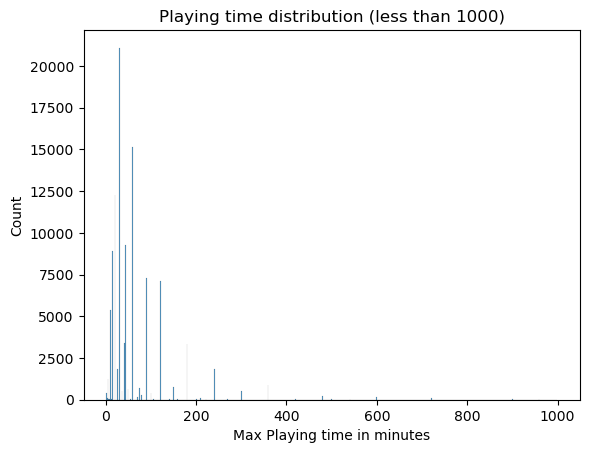

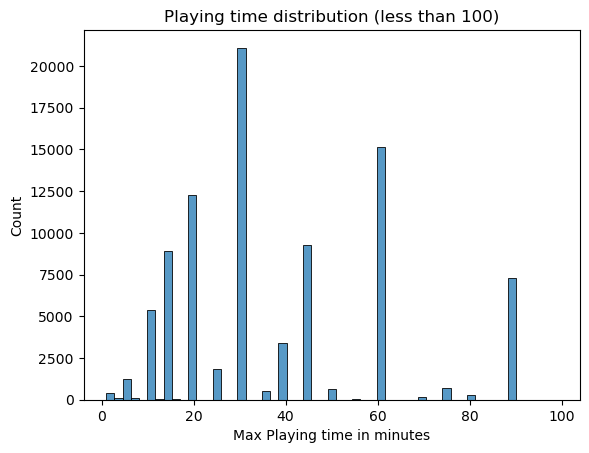

Minimum max playing time is 0
There are 27020 null max playing times
There are 288 extreme max playing times (more than 1000 minutes)
There are 74 entries with maxplaytime < minplaytime


In [10]:
null_minplayingtime = df[(df["minplaytime"] == 0) | (df["minplaytime"].isna())]
non_null_minplayingtime = df.loc[(df["minplaytime"] != 0) & df["minplaytime"].notna()]
less_than_1000_minplayingtime = non_null_minplayingtime.loc[non_null_minplayingtime["minplaytime"] < 1000]
less_than_100_minplayingtime = non_null_minplayingtime.loc[non_null_minplayingtime["minplaytime"] < 100]

null_maxplayingtime = df[(df["maxplaytime"] == 0) | (df["maxplaytime"].isna())]
non_null_maxplayingtime = df.loc[(df["maxplaytime"] != 0) & df["maxplaytime"].notna()]
less_than_1000_maxplayingtime = non_null_maxplayingtime.loc[non_null_maxplayingtime["maxplaytime"] < 1000]
less_than_100_maxplayingtime = non_null_maxplayingtime.loc[non_null_maxplayingtime["maxplaytime"] < 100]

sb.histplot(non_null_minplayingtime, x = "minplaytime")
plt.xlabel("Min Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (all values)")
plt.show()

sb.histplot(less_than_1000_minplayingtime, x = "minplaytime")
plt.xlabel("Min Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 1000)")
plt.show()

sb.histplot(less_than_100_minplayingtime, x = "minplaytime")
plt.xlabel("Min Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 100)")
plt.show()


print(f'Maximum min playing time is {max(df["minplaytime"])}')
print(f'There are {null_minplayingtime.shape[0]} null min playing times')
print(f'There are {non_null_minplayingtime.loc[non_null_minplayingtime["minplaytime"] > 1000].shape[0]} extreme min playing times (more than 1000 minutes)')


sb.histplot(non_null_maxplayingtime, x = "maxplaytime")
plt.xlabel("Max Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (all values)")
plt.show()

sb.histplot(less_than_1000_maxplayingtime, x = "maxplaytime")
plt.xlabel("Max Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 1000)")
plt.show()

sb.histplot(less_than_100_maxplayingtime, x = "maxplaytime")
plt.xlabel("Max Playing time in minutes")
plt.ylabel("Count")
plt.title("Playing time distribution (less than 100)")
plt.show()


print(f'Minimum max playing time is {min(df["maxplaytime"])}')
print(f'There are {null_maxplayingtime.shape[0]} null max playing times')
print(f'There are {non_null_maxplayingtime.loc[non_null_maxplayingtime["maxplaytime"] > 1000].shape[0]} extreme max playing times (more than 1000 minutes)')


# Next, we will analyze if there are any entries with maxplaytime < minplaytime

invalid_playingtimes = df.loc[(df["minplaytime"].notna()) & (df["maxplaytime"].notna()) & (df["minplaytime"] != 0) & (df["maxplaytime"] != 0) & (df["maxplaytime"] < df["minplaytime"])]
print(f'There are {invalid_playingtimes.shape[0]} entries with maxplaytime < minplaytime')




The analysis of minimum and maximum playtimes shows that while most games report reasonable durations, there are expected outliers, consistent with the previous playing time analysis. The majority of titles have modest minimum and maximum playtimes, which should be preserved. However, there are 74 records where minplaytime is greater than maxplaytime, which is not logically possible. These entries represent data inconsistencies and should be treated as errors—either removed from the dataset or corrected using alternative sources of information.

Next we will analyze the minage column.

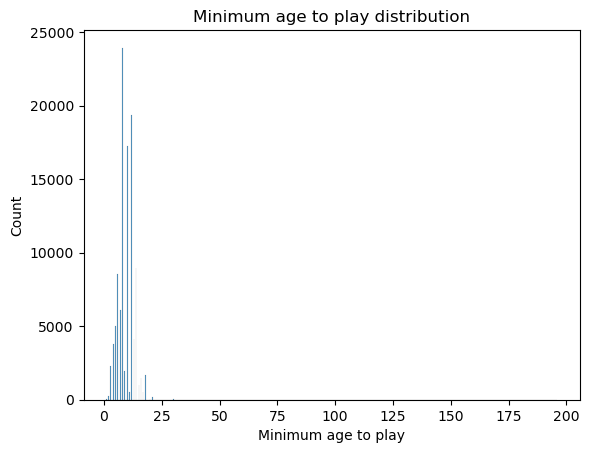

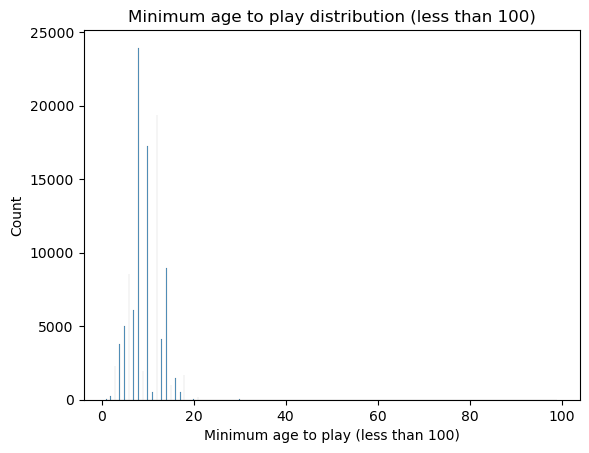

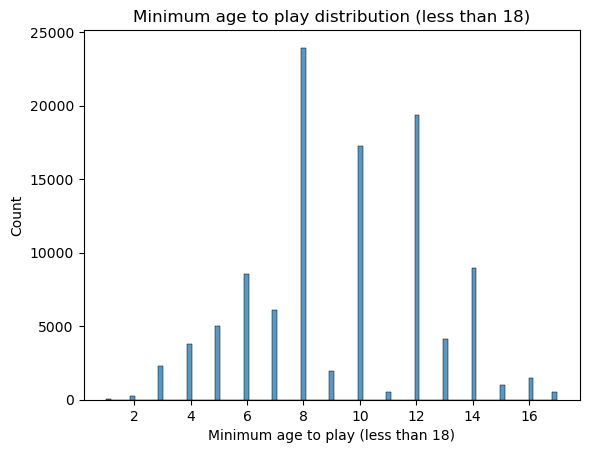

Maximum minimum age to play is 196
There are 25203 null minimum ages to play
There are 4 extreme minimum ages to play (more than 100 years old)


In [11]:
# Next we will analyze the minage column refering to the lowest age allowed for someone to play that boardgame.

null_minage = df[(df["minage"] == 0) | (df["minage"].isna())]
non_null_minage = df.loc[(df["minage"] != 0) & df["minage"].notna()]
less_than_100_minage = non_null_minage.loc[non_null_minage["minage"] < 100]
less_than_18_minage = non_null_minage.loc[non_null_minage["minage"] < 18]
sb.histplot(non_null_minage, x = "minage")
plt.xlabel("Minimum age to play")
plt.ylabel("Count")
plt.title("Minimum age to play distribution")
plt.show()

sb.histplot(less_than_100_minage, x = "minage")
plt.xlabel("Minimum age to play (less than 100)")
plt.ylabel("Count")
plt.title("Minimum age to play distribution (less than 100)")
plt.show()

sb.histplot(less_than_18_minage, x = "minage")
plt.xlabel("Minimum age to play (less than 18)")
plt.ylabel("Count")
plt.title("Minimum age to play distribution (less than 18)")
plt.show()

print(f'Maximum minimum age to play is {max(df["minage"])}')
print(f'There are {null_minage.shape[0]} null minimum ages to play')
print(f'There are {non_null_minage.loc[non_null_minage["minage"] > 100].shape[0]} extreme minimum ages to play (more than 100 years old)')


Since this column is optional, there is no need to remove entries with null or zero values. The most noticeable issue in the results is that four games have a minimum age greater than 100 years, which is clearly a data inconsistency. These entries should be removed from the dataset.

Next we will see the publishers, designers and artists columns.

In [12]:
null_publishers = df[df["publishers"].isna() | (df["publishers"].str.strip() == "")]
print(f'There are {null_publishers.shape[0]} null publishers')
print(f'There are {df["publishers"].nunique()} unique publishers')
print(f'The publisher with the most games is {df["publishers"].value_counts().idxmax()} with {df["publishers"].value_counts().max()} games')

null_designers = df[df["designers"].isna() | (df["designers"].str.strip() == "")]
print(f'There are {null_designers.shape[0]} null designers')
print(f'There are {df["designers"].nunique()} unique designers')
print(f'The designer with the most games is {df["designers"].value_counts().idxmax()} with {df["designers"].value_counts().max()} games')

null_artists = df[df["artists"].isna() | (df["artists"].str.strip() == "")]
print(f'There are {null_artists.shape[0]} null artists')
print(f'There are {df["artists"].nunique()} unique artists')
print(f'The artist with the most games is {df["artists"].value_counts().idxmax()} with {df["artists"].value_counts().max()} games')

print(df["publishers"].head(10))


There are 4 null publishers
There are 42008 unique publishers
The publisher with the most games is (Self-Published) with 8633 games
There are 23803 null designers
There are 37056 unique designers
The designer with the most games is (Uncredited) with 18800 games
There are 75678 null artists
There are 26449 unique artists
The artist with the most games is (Uncredited) with 4117 games
0    Roxley, Arclight Games, Board Game Rookie, Boa...
1    Z-Man Games, Asterion Press, Devir, Filosofia ...
2    Feuerland Spiele, Capstone Games, CMON Global ...
3    Cephalofair Games, Albi, Albi Polska, Arclight...
4    Dire Wolf, Arclight Games, Broadway Toys LTD, ...
5    Fantasy Flight Games, ADC Blackfire Entertainm...
6    FryxGames, Arclight Games, Brädspel.se, Fantas...
7    Ares Games, Angry Lion Games, Devir, GaGa Game...
8    Fantasy Flight Games, ADC Blackfire Entertainm...
9    Dire Wolf, Arclight Games, Galápagos Jogos, Ge...
Name: publishers, dtype: object


For these columns, there is little to analyze beyond the null values for publishers, designers, and artists. These missing values can either be treated as Uncredited or Self-Published, or the corresponding rows can be removed from the database. Since there are many entries with null designers and artists, it is preferable to assume these are entry errors and fill them with default values.

We will now analyze the categories, mechanics, families and expansion columns. 

In [13]:
# Categories, mechanics, families and expansion analysis

print(f'The column \'categories\' has {df[df["categories"].isna() | (df["categories"].str.strip() == "")].shape[0]} missing values.')
print(f'The column \'mechanics\' has {df[df["mechanics"].isna() | (df["mechanics"].str.strip() == "")].shape[0]} missing values.')
print(f'There are {df["categories"].nunique()} unique categories')
print(f'The category with the most games is {df["categories"].value_counts().idxmax()} with {df["categories"].value_counts().max()} games')
print(f'There are {df["mechanics"].nunique()} unique mechanics')
print(f'The mechanic with the most games is {df["mechanics"].value_counts().idxmax()} with {df["mechanics"].value_counts().max()} games')
print(f'The column \'families\' has {df[df["families"].isna() | (df["families"].str.strip() == "")].shape[0]} missing values.')
print(f'There are {df["families"].nunique()} unique families')
print(f'The family with the most games is {df["families"].value_counts().idxmax()} with {df["families"].value_counts().max()} games')
print(f'The column \'expansions\' has {df[df["expansions"].isna() | (df["expansions"].str.strip() == "")].shape[0]} missing values.')
print(f'There are {df["expansions"].nunique()} unique expansions')
print(f'The expansion with the most games is {df["expansions"].value_counts().idxmax()} with {df["expansions"].value_counts().max()} games')


The column 'categories' has 1075 missing values.
The column 'mechanics' has 18324 missing values.
There are 23247 unique categories
The category with the most games is Card Game with 6094 games
There are 31606 unique mechanics
The mechanic with the most games is Roll / Spin and Move with 7377 games
The column 'families' has 36602 missing values.
There are 41567 unique families
The family with the most games is Players: Two-Player Only Games with 4640 games
The column 'expansions' has 121797 missing values.
There are 9803 unique expansions
The expansion with the most games is The Ancient Scrolls of Danga'in, Lost Worlds Fantasy Cards, Treasure Hoard of the Cold Drake with 59 games


 As we can see, the dataset contains a very large vocabulary across these fields but also substantial missingness, especially for mechanics and expansions. On BoardGameGeek many of these attributes are optional or populated inconsistently, so missing values do not always indicate bad records; they do, however, reduce the usefulness of any category/mechanic/family-based filtering, recommendation, or faceted search. For this reason we will either input the missing values with default values like 'Unknown' or use the most common value of the column.

Next we will see the poll columns, which are columns of what the users/players voted for what was the suggested number of players, age to play and the level of language ability a player needs to have.

In [14]:
# Poll columns analysis

print(f'The column \'poll_suggested_numplayers\' has {df[df["poll_suggested_numplayers"].isna() | (df["poll_suggested_numplayers"].str.strip() == "")].shape[0]} missing values.')
print(f'The column \'poll_playerage\' has {df[df["poll_playerage"].isna() | (df["poll_playerage"].str.strip() == "")].shape[0]} missing values.')
print(f'The column \'poll_language_dependence\' has {df[df["poll_language_dependence"].isna() | (df["poll_language_dependence"].str.strip() == "")].shape[0]} missing values.')

The column 'poll_suggested_numplayers' has 0 missing values.
The column 'poll_playerage' has 3873 missing values.
The column 'poll_language_dependence' has 4045 missing values.


Although there are some missing values in poll_playerage and poll_language_dependence, these fields are optional and the amount of missingness is small. We do not need to make changes now.

Now we will analyse the number of users that rated a game

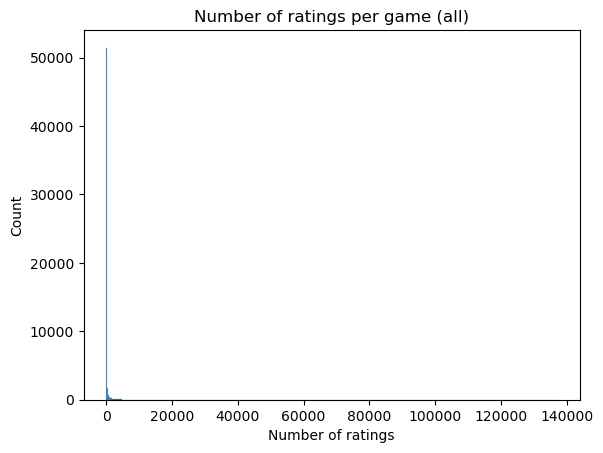

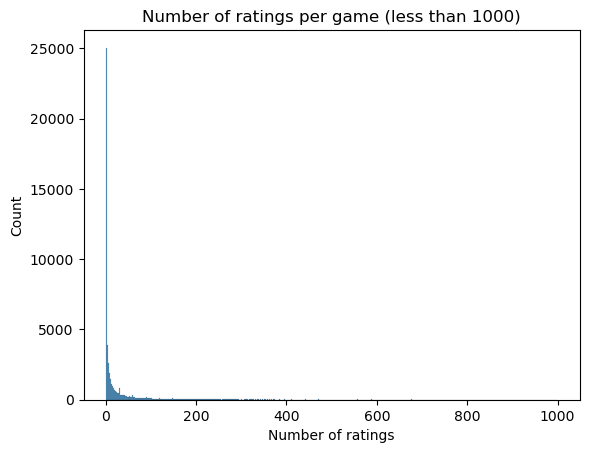

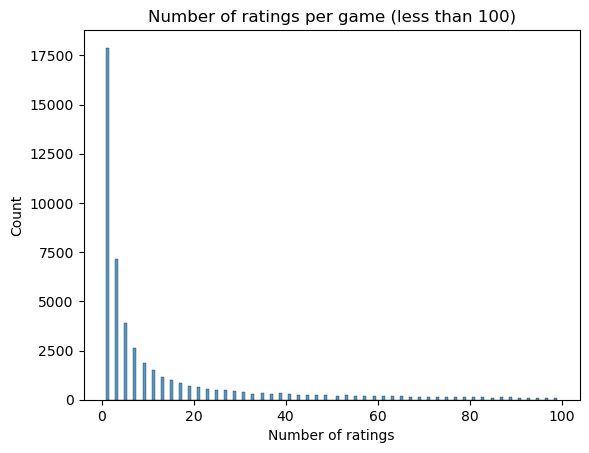

There are 31948 games with 0 users ratings
There are 0 games with null users ratings
Average of number of ratings is 215.24491245033312
Median of number of ratings is 3.0
The maximum number of ratings is 137071
The minimum number of ratings is 1 (excluding 0)


In [26]:
zero_ratings = df[df["usersrated"] == 0]
null_ratings = df[df["usersrated"].isna()]
non_null_ratings = df[df["usersrated"].notna() & df["usersrated"] != 0]


sb.histplot(non_null_ratings, x = "usersrated")
plt.xlabel("Number of ratings")
plt.title("Number of ratings per game (all)")
plt.show()

ratings_less_1000 = non_null_ratings[non_null_ratings["usersrated"] < 1000]

sb.histplot(ratings_less_1000, x = "usersrated")
plt.xlabel("Number of ratings")
plt.title("Number of ratings per game (less than 1000)")
plt.show()

ratings_less_100 = non_null_ratings[non_null_ratings["usersrated"] < 100]

sb.histplot(ratings_less_100, x = "usersrated")
plt.xlabel("Number of ratings")
plt.title("Number of ratings per game (less than 100)")
plt.show()

print(f'There are {zero_ratings.shape[0]} games with 0 users ratings')
print(f'There are {null_ratings.shape[0]} games with null users ratings')
print(f'Average of number of ratings is {df["usersrated"].mean()}')
print(f'Median of number of ratings is {df["usersrated"].median()}')
print(f'The maximum number of ratings is {max(non_null_ratings["usersrated"])}')
print(f'The minimum number of ratings is {min(non_null_ratings["usersrated"])} (excluding 0)')

As we can see, a large number of games do not have a single user rating. These cases likely correspond to games that are either new or not very popular. We can represent these values as 0, since the absence of ratings itself provides useful information about a game’s popularity and can be leveraged in search and filtering.

We also observe that while the average number of ratings is around 215, the median is only 3. This indicates a highly skewed distribution: a small set of very popular games accumulate a disproportionately high number of reviews, raising the average, whereas the majority of games receive only three or fewer ratings.

Now we will analyze the average rating given by users.

There are 31948 ratings equal to zero


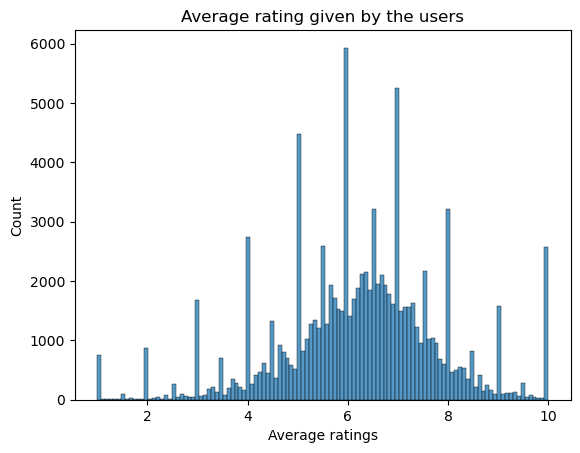

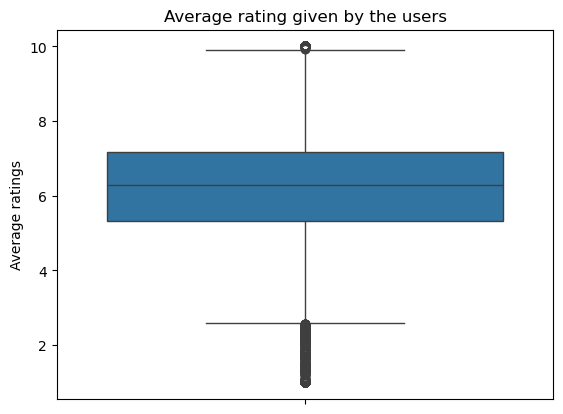

The average is 4.72744452085631
The average is 6.231242015253799 (when excluding the zero ratings)


In [33]:
non_zero_average = df[df["average"] != 0]
zero_average = df[df["average"] == 0]
print(f'There are {zero_average.shape[0]} ratings equal to zero')

sb.histplot(non_zero_average, x = "average")
plt.xlabel("Average ratings")
plt.title("Average rating given by the users")
plt.show()

sb.boxplot(non_zero_average, y="average")
plt.ylabel("Average ratings")
plt.title("Average rating given by the users")
plt.show()

print(f'The average is {df["average"].mean()}')
print(f'The average is {non_zero_average["average"].mean()} (when excluding the zero ratings)')

We observe that a considerable number of games have an average rating of zero. This finding is consistent with the earlier analysis of the number of ratings per game, where many titles had no user reviews at all.
When examining the distribution of average ratings, we find that the median is around 6 and the average around 6.2 (when excluding the 0 ratings), which is a reasonable outcome given the size of the dataset—after all, not every game should be rated as either very good or very bad.
Additionally, some average ratings appear as outliers in the boxplot. However, these values are still realistic, since it is entirely possible for certain games to be perceived as exceptionally poor or outstanding.

Now we will analyse the bayes average column.

There are 102662 ratings equal to zero


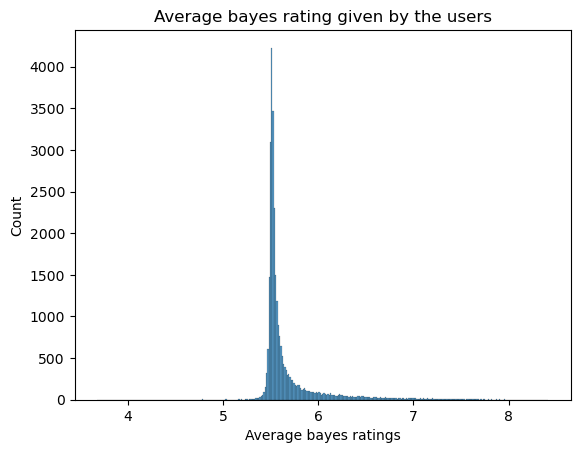

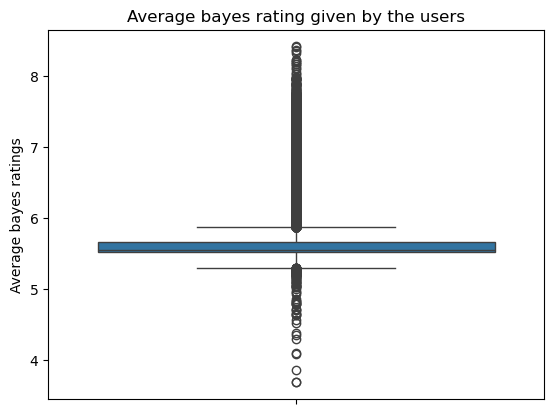

The bayes average is 1.2730520943934978
The bayes average is 5.670564682368776 (when excluding the zero ratings)
The bayes average median is 5.538315 (when excluding the zero ratings)


In [35]:
non_zero_average_bayes = df[df["bayesaverage"] != 0]
zero_average_bayes = df[df["bayesaverage"] == 0]
print(f'There are {zero_average_bayes.shape[0]} ratings equal to zero')

sb.histplot(non_zero_average_bayes, x = "bayesaverage")
plt.xlabel("Average bayes ratings")
plt.title("Average bayes rating given by the users")
plt.show()

sb.boxplot(non_zero_average_bayes, y="bayesaverage")
plt.ylabel("Average bayes ratings")
plt.title("Average bayes rating given by the users")
plt.show()

print(f'The bayes average is {df["bayesaverage"].mean()}')
print(f'The bayes average is {non_zero_average_bayes["bayesaverage"].mean()} (when excluding the zero ratings)')
print(f'The bayes average median is {non_zero_average_bayes["bayesaverage"].median()} (when excluding the zero ratings)')

We observe that the number of zero ratings is significantly higher than the overall average. This occurs because some games only receive one or two ratings, and the Bayesian average smooths these cases to prevent them from disproportionately affecting the overall average.

These results can still serve as a useful reference when classifying the importance of a game in search. In situations where the Bayesian average is zero, we can complement it with the normal average, assigning it a lower weight to ensure that games with very few ratings do not dominate the ranking.

Now we are going to analize the standart devian of the ratings.

There are 52191 ratings with std equal to zero


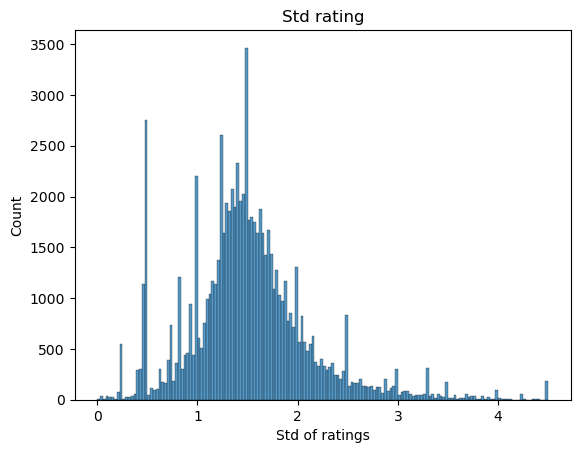

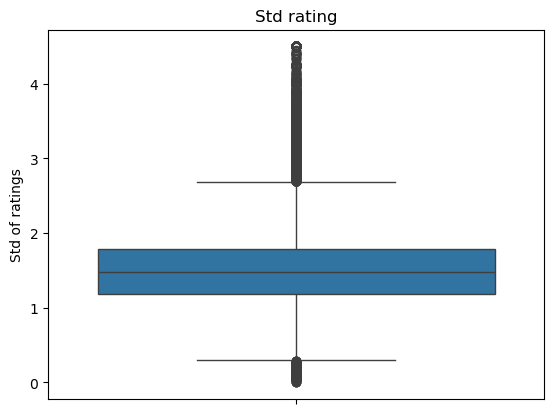

The std is 0.9204362778742579
The std is 1.5194871661102867 (when excluding the zero std)
The std median is 1.47388 (when excluding the zero std)


In [36]:
non_zero_std = df[df["stddev"] != 0]
zero_std = df[df["stddev"] == 0]
print(f'There are {zero_std.shape[0]} ratings with std equal to zero')

sb.histplot(non_zero_std, x = "stddev")
plt.xlabel("Std of ratings")
plt.title("Std rating")
plt.show()

sb.boxplot(non_zero_std, y="stddev")
plt.ylabel("Std of ratings")
plt.title("Std rating")
plt.show()

print(f'The std is {df["stddev"].mean()}')
print(f'The std is {non_zero_std["stddev"].mean()} (when excluding the zero std)')
print(f'The std median is {non_zero_std["stddev"].median()} (when excluding the zero std)')

As we can see, a large number of standard deviation values are equal to zero. This outcome is expected, since some games receive more consistent ratings than others—particularly those with only a small number of reviews.

These results can be useful in search, either by enabling filters for games with more consistent ratings or by giving additional weight to such games in ranking. However, caution is needed: low standard deviation values may also result from games with very few ratings or even no ratings at all, which would naturally lead to an average of zero.

Now we will analyze the median of the ratings.

There are 132382 ratings with median equal to zero


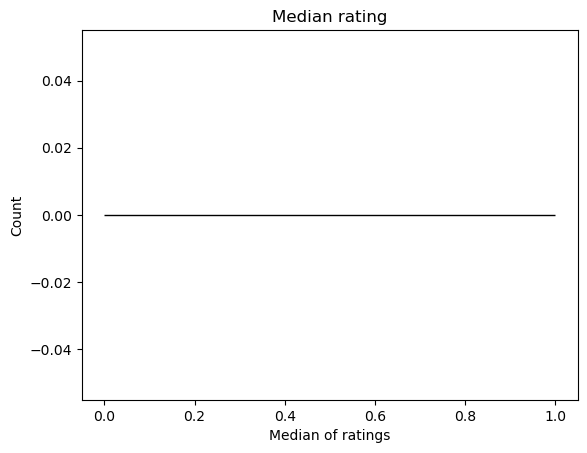

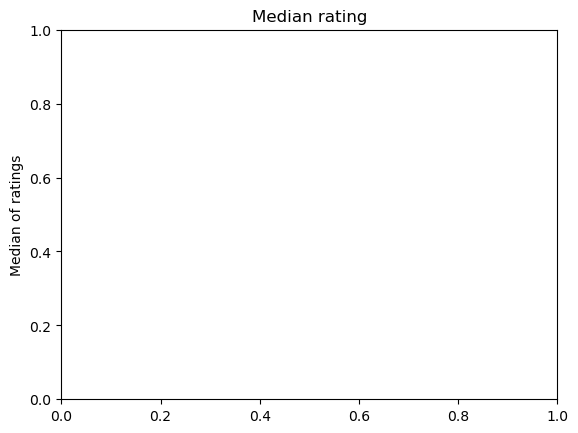

The median is 0.0
The median is nan (when excluding the zero median)
The median median is nan (when excluding the zero median)
0         0
1         0
2         0
3         0
4         0
         ..
132377    0
132378    0
132379    0
132380    0
132381    0
Name: median, Length: 132382, dtype: int64


In [38]:
non_zero_median = df[df["median"] != 0]
zero_median = df[df["median"] == 0]
print(f'There are {zero_median.shape[0]} ratings with median equal to zero')

sb.histplot(non_zero_median, x = "median")
plt.xlabel("Median of ratings")
plt.title("Median rating")
plt.show()

sb.boxplot(non_zero_median, y="median")
plt.ylabel("Median of ratings")
plt.title("Median rating")
plt.show()

print(f'The median is {df["median"].mean()}')
print(f'The median is {non_zero_median["median"].mean()} (when excluding the zero median)')
print(f'The median median is {non_zero_median["median"].median()} (when excluding the zero median)')
print(df["median"])

This column contains only zero values across all entries, making it uninformative and suitable for removal from the dataset.

Now, we will analyze the owned column.

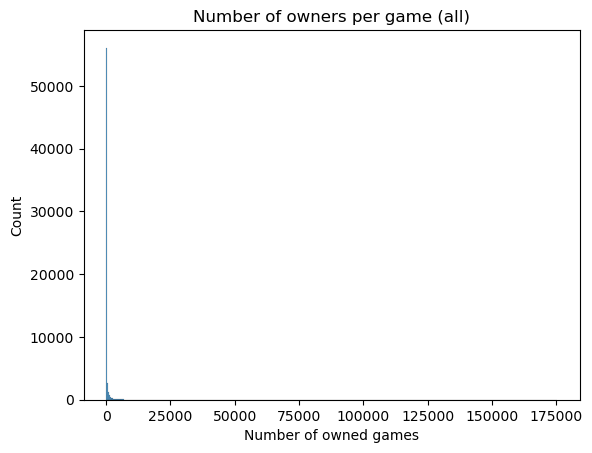

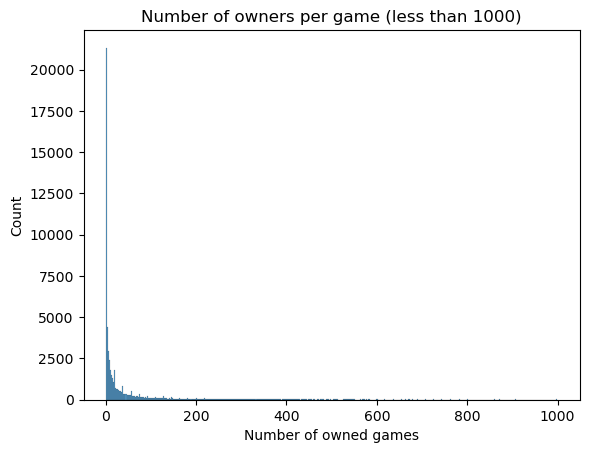

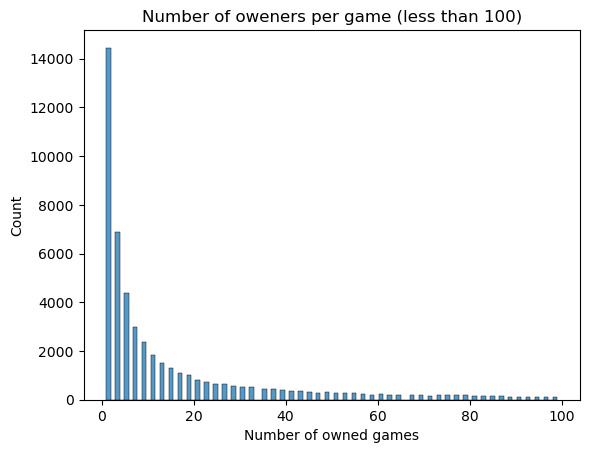

There are 14233 games with 0 owners
There are 0 games with null owners
Average of number of owners is 395.9846504811832
Median of number of owners is 9.0
The maximum number of owners is 175387
The minimum number of owners is 1 (excluding 0)


In [42]:
zero_owned = df[df["owned"] == 0]
null_owned = df[df["owned"].isna()]
non_null_owned = df[df["owned"].notna() & df["owned"] != 0]


sb.histplot(non_null_owned, x = "owned")
plt.xlabel("Number of owned games")
plt.title("Number of owners per game (all)")
plt.show()

owned_less_1000 = non_null_owned[non_null_owned["owned"] < 1000]

sb.histplot(owned_less_1000, x = "owned")
plt.xlabel("Number of owned games")
plt.title("Number of owners per game (less than 1000)")
plt.show()

owned_less_100 = non_null_owned[non_null_owned["owned"] < 100]

sb.histplot(owned_less_100, x = "owned")
plt.xlabel("Number of owned games")
plt.title("Number of oweners per game (less than 100)")
plt.show()

print(f'There are {zero_owned.shape[0]} games with 0 owners')
print(f'There are {null_owned.shape[0]} games with null owners')
print(f'Average of number of owners is {df["owned"].mean()}')
print(f'Median of number of owners is {df["owned"].median()}')
print(f'The maximum number of owners is {max(non_null_owned["owned"])}')
print(f'The minimum number of owners is {min(non_null_owned["owned"])} (excluding 0)')

We observe that a large number of games have zero owners, and the majority of titles are owned by fewer than 20 people. The data also shows that while the average number of owners per game is around 396, the median is only 9. This indicates a highly skewed distribution: a small subset of games are widely owned, while most are owned by very few people—an expected outcome given the size of the dataset.

These values can be valuable for search and ranking, as they provide a measure of a game’s popularity and relevance, which can be incorporated into classification or recommendation strategies.

Now we will analyse the trading column.

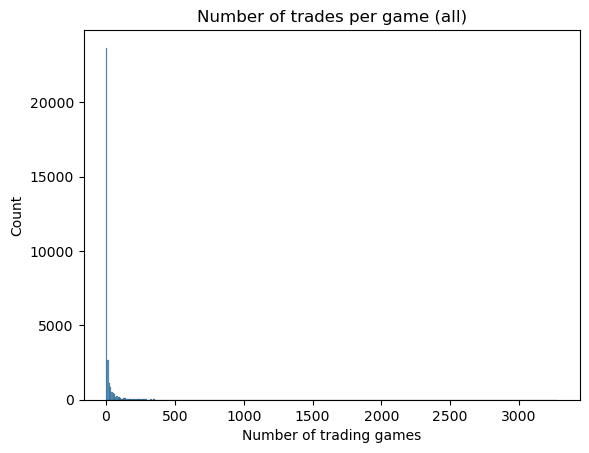

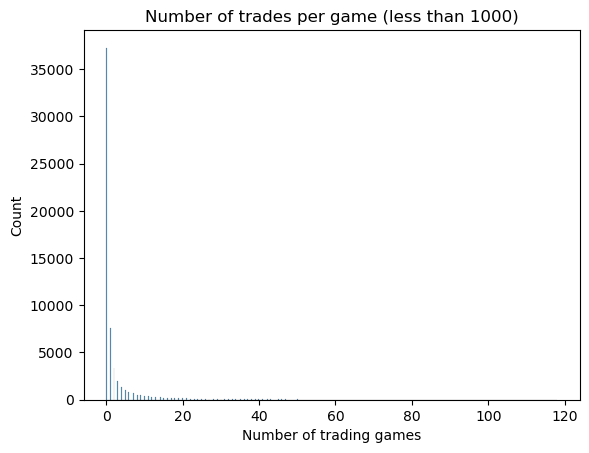

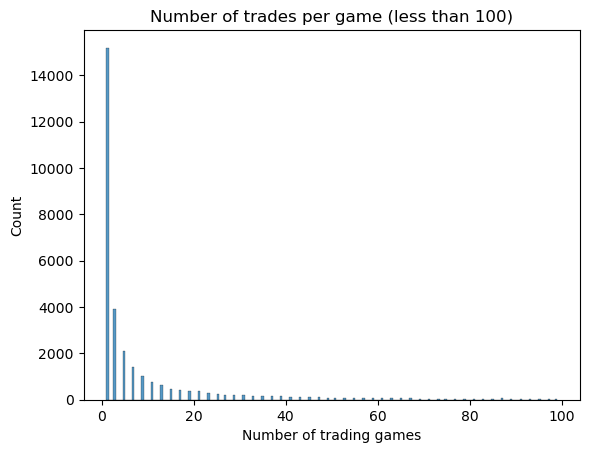

There are 79849 games with 0 trades
There are 0 games with null trades
Average of number of trades is 9.777930534362678
Median of number of trades is 0.0
The maximum number of trades is 3277
The minimum number of trades is 1 (excluding 0)


In [43]:
zero_trading = df[df["trading"] == 0]
null_trading = df[df["trading"].isna()]
non_null_trading = df[df["trading"].notna() & df["trading"] != 0]


sb.histplot(non_null_trading, x = "trading")
plt.xlabel("Number of trading games")
plt.title("Number of trades per game (all)")
plt.show()

trading_less_1000 = non_null_trading[non_null_trading["trading"] < 1000]

sb.histplot(owned_less_1000, x = "trading")
plt.xlabel("Number of trading games")
plt.title("Number of trades per game (less than 1000)")
plt.show()

trading_less_100 = non_null_trading[non_null_trading["trading"] < 100]

sb.histplot(trading_less_100, x = "trading")
plt.xlabel("Number of trading games")
plt.title("Number of trades per game (less than 100)")
plt.show()

print(f'There are {zero_trading.shape[0]} games with 0 trades')
print(f'There are {null_trading.shape[0]} games with null trades')
print(f'Average of number of trades is {df["trading"].mean()}')
print(f'Median of number of trades is {df["trading"].median()}')
print(f'The maximum number of trades is {max(non_null_trading["trading"])}')
print(f'The minimum number of trades is {min(non_null_trading["trading"])} (excluding 0)')

Most games have a relatively small number of trades, with the majority involving fewer than 20. However, there are some titles with a large volume of trades, likely driven by their higher number of owners. Conversely, a significant portion of games show zero trades, which can be attributed to their lower ownership levels.

These results can be valuable for the search system, as a high number of trades may indicate that a game is popular. However, if the ratio of trades to owned copies is unusually high, it could suggest that many owners are actively trying to trade away their games, which may reflect lower long‑term appeal or satisfaction.

Now we will analize the wainting column.